<a href="https://colab.research.google.com/github/KChittaranjan/airbnb-data-analysis/blob/main/AirBnB_Capstone_Project_Chittaranjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-t6jqkuet
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-t6jqkuet
     |████████████████████████████████| 14.8MB 311kB/s 
     |████████████████████████████████| 6.5MB 36.1MB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+114.gd8dfa01-py2.py3-none-any.whl size=986432 sha256=26c98f7b5f8eb690b43c493fed15c4e4a8514bdbe2135440a76b89d2b88deac3
  Stored in directory: /tmp/pip-ephem-wheel-cache-soafrp7i/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [90]:
%matplotlib inline

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point

import geopandas as gpd
from geopandas import GeoDataFrame

In [121]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
file_path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Capstone Project/Airbnb NYC 2019.csv'

df = pd.read_csv(file_path)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [103]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [95]:
df.loc[df['price'] == 0,'price']

23161    0
25433    0
25634    0
25753    0
25778    0
25794    0
25795    0
25796    0
26259    0
26841    0
26866    0
Name: price, dtype: int64

In [96]:
#correcting the prices with 0 values to median values
df.loc[df['price'] == 0,'price'] = df.loc[df['price'] != 0,'price'].median()

In [ ]:
df.loc[df['price'] == 0,'price']

Series([], Name: price, dtype: int64)

In [97]:
neighbourhood_group_df = df.groupby('neighbourhood_group')['price'].mean().reset_index()

In [100]:
neighbourhood_group_df['number_of_reviews'] = neighbourhood_group_number_df['number_of_reviews']

In [101]:
neighbourhood_group_df

,neighbourhood_group,price,number_of_reviews
0,Bronx,87.593951,28371
1,Brooklyn,124.430661,486574
2,Manhattan,196.880707,454569
3,Queens,99.517649,156950
4,Staten Island,114.812332,11541


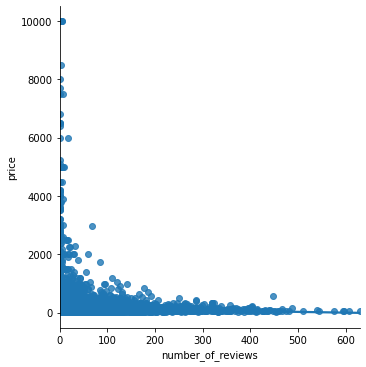

In [123]:
sns.lmplot(x='number_of_reviews', y='price', data= df )

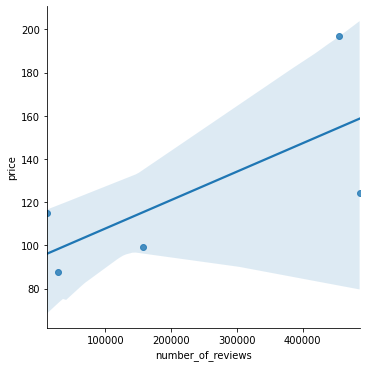

In [125]:
sns.lmplot(x='number_of_reviews', y='price', data= neighbourhood_group_df )

In [118]:
correlation_price_reviews = df.loc[:,['price','number_of_reviews']]

In [119]:
correlation_price_reviews.corr()

,price,number_of_reviews
price,1.000000,-0.047932
number_of_reviews,-0.047932,1.000000


In [109]:
neighbourhood_df = df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [111]:
neighbourhood_df['number_of_reviews'] = (df.groupby(['neighbourhood_group','neighbourhood'])['number_of_reviews'].sum().reset_index())['number_of_reviews']

In [112]:
neighbourhood_df

,neighbourhood_group,neighbourhood,price,number_of_reviews
0,Bronx,Allerton,87.595238,1803
1,Bronx,Baychester,75.428571,310
2,Bronx,Belmont,77.125000,296
3,Bronx,Bronxdale,57.105263,458
4,Bronx,Castle Hill,63.000000,118
...,...,...,...,...
216,Staten Island,Tottenville,144.857143,139
217,Staten Island,West Brighton,80.555556,656
218,Staten Island,Westerleigh,71.500000,18
219,Staten Island,Willowbrook,249.000000,9


In [122]:
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
plt.plot()


In [ ]:
plt.plot()

plt.title('Monthly Sales in the year 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Month')

In [ ]:
room_type_df = df.groupby('room_type')['price'].mean()

In [ ]:
room_type_df

room_type
Entire home/apt    211.802590
Private room        89.814208
Shared room         70.310345
Name: price, dtype: float64

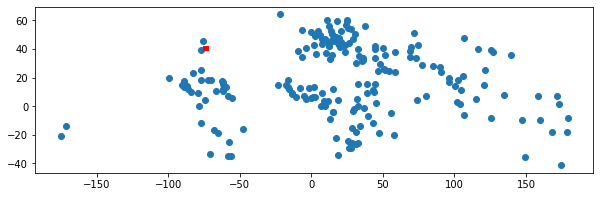

In [ ]:


geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);